# <center>2018 Elections - Progresive Victories in the Democratic primaries</center>
### <center>Udacity Data Analysis Nano-Degree / by Aviad Giat</center>
# <center><span style="color:#3c8a9e">Bi-Variate Exploration</span></center>

### Table of Contents 
[Progressive & Won](#Progressive-&-Won) <br> [Endorsements and Won](#Endorsements-and-Won) <br> [Endorsements and Primary Percent](#Endorsements-and-Primary-Percent) <br> [Candidate and Progressives](#Candidate-and-Progressives) <br> [State and Progressives](#State-and-Progressives) <br> [Race and Endorsements](#Race-and-Endorsements) <br> [Percent and Won](#Percent-and-Won) <br> [Progressive and Primary Percent](#Progressive-and-Primary-Percent)

### Import libraries

In [269]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display_html

In [270]:
%%html
<style>.output_wrapper, .output {height:auto !important; max-height:10000px;
                                }.output_scroll {box-shadow:none !important; webkit-box-shadow:none !important;}</style>

### Upload the data from Exploration1 file

In [271]:
dem = pd.read_csv('dem.csv')
dem.head(2)

,Candidate,State,Office Type,Date,Partisan Lean,Primary %,Won,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,Endorsements,value,Progressive
0,A.J. Balukoff,ID,Governor,5/15/18,-34.3,40.1,No,White,No,No,No,Yes,No,No,No
1,Aaron Godfrey,OH,Representative,5/8/18,-17.0,7.9,No,NaN,No,No,No,No,Our Revolution Endorsed?,Yes,Yes


Back to [top](#Bi-Variate-Exploration)

# <font color='84A3C1'>Progressive & Won</font>
How many Progressive candidates won the primaries?

In [272]:
# Number of all candidates who won
all_endorsed = dem.loc[(dem['value'] == 'Yes')]
all_endorsed = all_endorsed.drop_duplicates(['Candidate', 'Progressive'], keep = 'last')


# Number of all candidates (unique)
all_can = dem['Candidate'].unique()


# Number of Progressive candidates who won
# Group by Candidate and Progressive
pro_win = dem.groupby(['Candidate', 'Progressive', 'Won']).count().reset_index()
pro_ran = dem.groupby(['Candidate', 'Progressive', 'Won']).count().reset_index()

# # Drop rows that have the same candidate name and prorgessive value.
pro_win = pro_win.drop_duplicates(['Candidate', 'Progressive'], keep = 'last')
pro_ran = pro_win.drop_duplicates(['Candidate', 'Progressive'], keep = 'last')

# # Drop rows that have the same candidate name and keep the last, which is the 'Yes' value under the Progressive column
pro_win = pro_win.drop_duplicates('Candidate', keep = 'last')
pro_ran = pro_win.drop_duplicates('Candidate', keep = 'last')

# # Filter to find only winning progressives
pro_win = pro_win.loc[(pro_win['Won'] == 'Yes') & (pro_win['Progressive'] == 'Yes')]
pro_ran = pro_ran.loc[(pro_ran['Progressive'] == 'Yes')]


print("\n\033[37m\033[1mFrom","\033[92m\033[1m",len(all_endorsed['Candidate'].unique()),
      "\033[92m\033[0m","\033[37m\033[1mcandidates who received endorsements out of",
      "\033[92m\033[1m",len(all_can),"\033[92m\033[0m",
      "\033[37m\033[1munique candidates in the Democratic primaries of 2018\033[0m,",
      "\033[37m\033[1mthere were","\033[92m\033[1m",len(pro_win['Candidate'].unique()),
      "\033[92m\033[0m","\033[37m\033[1mProgressive winnings out of",
      "\033[92m\033[1m",len(pro_ran['Progressive']),"\033[92m\033[0m",
      "\033[37m\033[1mProgressive candidates who ran.",
      "That is a", round(len(pro_win['Candidate'].unique())/len(dem[dem['Progressive'] == 'Yes'])*100, 1), 
      "percent of success for the Progressive movement with winning the Democratic primaries.\033[0m")


From  311  candidates who received endorsements out of  839  unique candidates in the Democratic primaries of 2018, there were  34  Progressive winnings out of  105  Progressive candidates who ran. That is a 24.1 percent of success for the Progressive movement with winning the Democratic primaries.


* Note that the number of Progressives winnings might be larger in reality, since there might have been candidates that were Progressives but did not receive an endorsement from a Progressive pac.<br>
I will look at how many Progressive candidates won in each state in the [Progressive Won and State](Exploration4.ipynb#Progressive-Won-and-State) analysis under the Multi-variant explorations.

Back to [top](#Bi-Variate-Exploration)

# <font color='85ad0c'>Endorsements and Won</font>
Is there a correlation between a pac number of endorsements and the number of their candidates who won the primaries?

Endorsements that resulted with winnings
 Guns Sense Candidate?       94
Biden Endorsed?             62
Our Revolution Endorsed?    24
Indivisible Endorsed?       24
Party Support?              20
Emily Endorsed?             17
Justice Dems Endorsed?      15
WFP Endorsed?               14
Sanders Endorsed?           10
VoteVets Endorsed?          10
PCCC Endorsed?               7
Name: Endorsements, dtype: int64


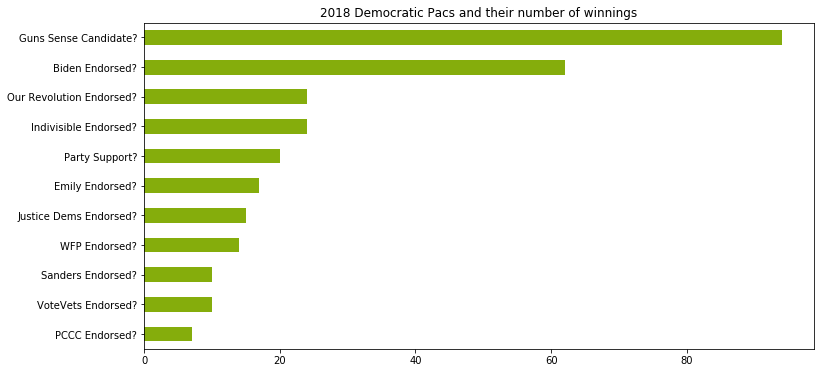

In [273]:
# Find the endorsements with only 'Yes' value under the 'Won' column
endors_yes_won = dem[(dem.Endorsements != 'No') & (dem['Won'] == 'Yes')]
print("\033[32m\033[1mEndorsements that resulted with winnings\033[0m\n", endors_yes_won['Endorsements'].value_counts())

# Plot Endorsements
fig, ax = plt.subplots(figsize=(12,6))
endors_yes_won['Endorsements'].value_counts().plot(kind="barh",color='#85ad0c').invert_yaxis()
plt.title("2018 Democratic Pacs and their number of winnings")
plt.show()

# Breakdown of Guns Sense' achievements 
gunsense = dem[(dem.Endorsements == 'Guns Sense Candidate?') & (dem['Won'] == 'Yes')]

From all pacs the Guns Sense where the ones that made it big time with succeeding to push their candidates to a win. They reached 94 candidates who won the primaries. We can also see that Biden came out 2nd with 62 winning endorsements.
From the Progressives, Our Revolution came 3rd, together with Indivisible, counting 24 endorsements that won, each.<br>
Was there a correlation between the number of endorsements and the success rate for those pacs?

### Success rate for each pac

,Pac,Percent Success,Winnings,Endorsements
0,Party Support?,90.9,20,22
1,PCCC Endorsed?,63.6,7,11
2,Biden Endorsed?,63.3,62,98
3,Indivisible Endorsed?,60,24,40
4,Emily Endorsed?,53.1,17,32
5,WFP Endorsed?,48.3,14,29
6,Guns Sense Candidate?,45.6,94,206
7,VoteVets Endorsed?,45.5,10,22
8,Sanders Endorsed?,38.5,10,26
9,Justice Dems Endorsed?,31.2,15,48


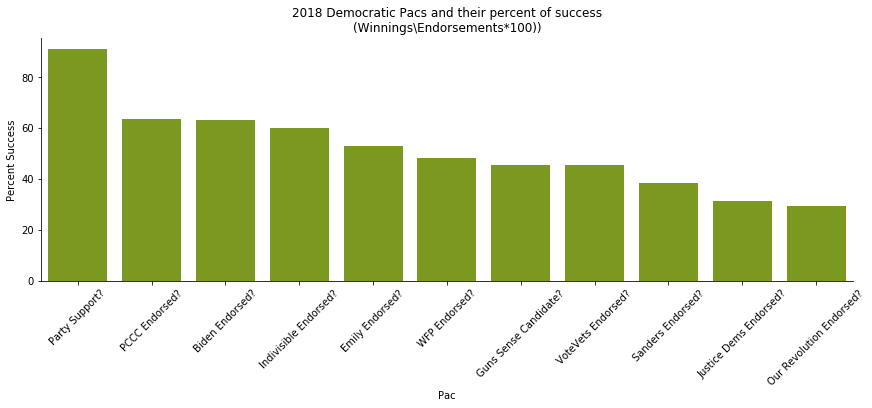

In [274]:
# Find all endorsements for each pac
endors_yes = dem[dem['value'] == 'Yes']
endors_yes = dem['Endorsements'].value_counts()

# # Find number of successful endorsements for each pac
endors_yes_won = dem[(dem['Won'] == 'Yes') & (dem['Endorsements'] != 'No')]
endors_yes_won = endors_yes_won['Endorsements'].value_counts()

# # Find the number of successes for each endorsing pac
endors_success = round(endors_yes_won / endors_yes * 100, 1).sort_values(ascending=False)

# # Endorsers Success table
# # Create an empty data frame with just desired column names
success = pd.DataFrame(columns = ['Percent Success', 'Winnings', 'Endorsements'])

# # Put series value inside data frame using mapping concept
success['Percent Success'] = endors_success
success['Winnings'] = endors_yes_won
success['Endorsements'] = endors_yes

# Drop NA line
success = success.dropna()

# Name the index column
success.index.name = 'Pac'

# reset the index
success.reset_index(inplace = True)

# Plot percent success
per_success = sb.catplot(x="Pac", y="Percent Success", color="#85ad0c", data=success, kind='bar');
per_success.fig.set_size_inches(16,4)
plt.title("2018 Democratic Pacs and their percent of success\n(Winnings\Endorsements*100))")
plt.xticks(rotation = 45);

# Print table
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #85ad0c' if v else '' for v in is_max]
success.style.apply(highlight_max, subset=['Percent Success','Winnings', 'Endorsements'])

Endorsements by the Democratic party almost always ended up in a win, with 91% success rate!<br>
The PCCC and Joe Biden ended up with 63% success rate, while Bernie Sanders, Justice Democrats and Our Revolution ended up with less than 40%. Guns Sense, despite having the highest numbers of endorsements and winnings, ended up with 46% success rate. <br>
Were these success rates correlated to the number of endorsements a pac had?

### Correlation between number of endorsements and success rate

C:\Users\Aviad\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1296x1440 with 0 Axes>

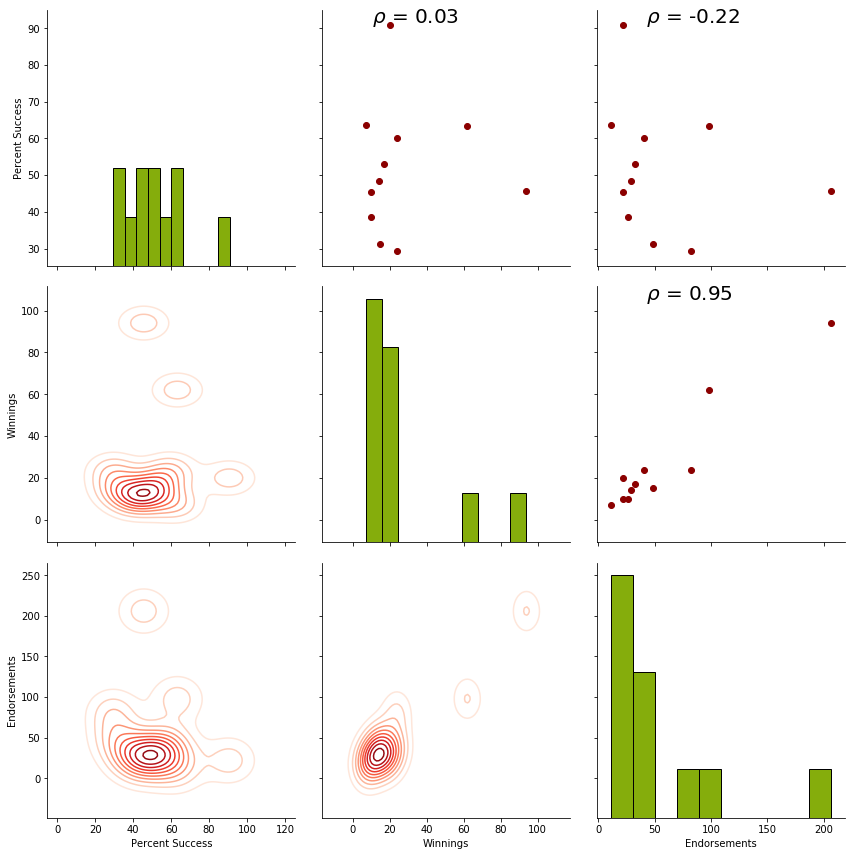

In [202]:
# print(success.corr())
plt.figure(figsize=(18,20))

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca();
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sb.PairGrid(data= success, height = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sb.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = '#85ad0c')
plt.show();

We can see that there is a strong correlation between winnings and endorsements (almost 1, which is absolute correlation). This can be used as a tactic for endorsers who want to bring in many candidates. Endorse many, few will fall in. Maybe that's what Guns Sens, Biden, Our Revolution and Justice Democrats excatly did with their high numbers of endorsements?<br>
We can also see above that the correlation between the success and both winnings and endorsements is very week.<br>
So, we wouldn't be able to project the success rate for winning the primaries based on the number of endorsements a pac had. We can definitely say that, according to the above data, from only the last primaries, having the Party's endorsement is having the best probability to succeed in the Democratic primaries.

Back to [top](#Bi-Variate-Exploration)

# <font color="#b4c93e">Endorsements and Primary Percent</font>


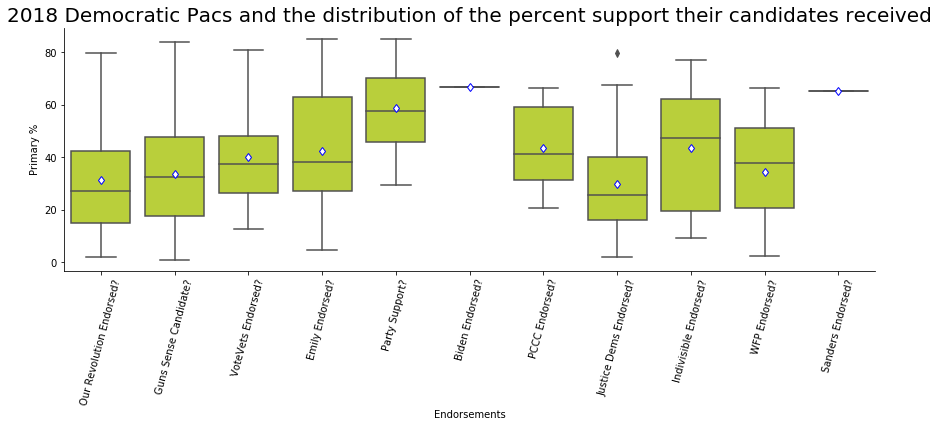

In [203]:
# Remove the 100% percenters, which were appointed more than elected from the lack of contenders.
dem1 = dem[dem['Primary %'] != 100]

# Remove candidates that were not endorsed by a pac
dem1 = dem1[dem1['Endorsements'] != 'No']

# Box plot of the endorsements and the percent votes
dem_success = sb.catplot(x="Endorsements", y="Primary %", kind="box", data=dem1, color = "#cae822", showmeans=True, 
                         meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"});
dem_success.fig.set_size_inches(16,4)
plt.title("2018 Democratic Pacs and the distribution of the percent support their candidates received", size=20)
plt.xticks(rotation = 75)
plt.show()

After removing the 100 percenters, in the Boxplot and tables above we can see that the ranges of the percent support candidates received for all pacs was between 0.9 and 85.2. The ones with 100% were candidates who did not have a competition inside the Democratic party, thus received 100 as the percent of support. <br>
As far as outliers
2 boxes that stand out are the 'Party Support' and 'Biden Support' with their high levels of support. We can see that the median for both is about 70% support. This means that in average candidates who were supported by the Dmocratic party establishment itself received more votes than any other candidates. This sits well with the fact that candidates endorsed by the party had 91% success rate. Joe Biden had a high turnaround as well with the success rate of his candidates (63%), which fits the above boxplot for his pac.

In [204]:
# Print table
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #85ad0c' if v else '' for v in is_max]



end_per_highlights = round(dem1.groupby('Endorsements')['Primary %'].describe(), 2)
end_per_highlights.style.apply(highlight_max, subset=['count', 'mean', 'std', 'min', '25%', '50%', '75%','max'])


,count,mean,std,min,25%,50%,75%,max
Endorsements,,,,,,,,
Biden Endorsed?,2,66.8,0,66.8,66.8,66.8,66.8,66.8
Emily Endorsed?,30,42.26,21.94,4.5,26.92,38.05,62.85,85.2
Guns Sense Candidate?,193,33.71,20.15,0.9,17.4,32.4,47.7,83.8
Indivisible Endorsed?,33,43.64,22.81,9.2,19.4,47.5,62.1,77.2
Justice Dems Endorsed?,43,29.72,18.68,1.9,15.95,25.4,40.15,79.8
Our Revolution Endorsed?,78,31.34,21.24,1.9,15,27.05,42.55,79.8
PCCC Endorsed?,10,43.38,16.73,20.5,31.18,41.15,59.02,66.4
Party Support?,17,58.59,16.79,29.5,45.7,57.8,70.1,85.2
Sanders Endorsed?,1,65.3,nan,65.3,65.3,65.3,65.3,65.3


Let's combine the Progressive pacs to one and compare it to the Party Support pac and to alll other pacs' percent of support distribution. I will do that in the Multi-variant exploration, in Exploration4 file.

Back to [top](#Bi-Variate-Exploration)

# <font color='e09c4a'>Candidate and Progressives</font>
How many candidates were Progressive?

105 Progressive candidates participated in the primaries throughout the states. 
Here are the top 20 (by number of endorsements)
         Candidate  Endorsements
0   Abdul El-Sayed             3
1     Brent Welder             3
2    Rashida Tlaib             3
3     Rick Trevi̱o             2
4     Greg Edwards             2
5      Laura Moser             2
6      Peter Jacob             2
7      Dana Balter             2
8      David Benac             2
9   Patrick Nelson             2
10    Jessica King             2
11    Linsey Fagan             2
12   Derrick Crowe             2
13       Lisa Ring             2
14  Dorothy Gasque             2
15    Dotty Nygard             2
16  James Thompson             2
17      Ian Golden             2
18    Rob Davidson             2
19  Hector Morales             2


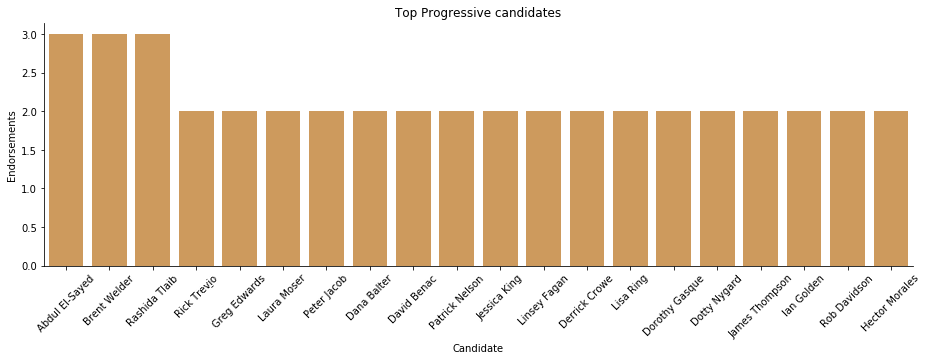

In [205]:
# Create a new dataframe
top_can_end = dem[['Candidate', 'Endorsements', 'Progressive']]
top_can_end = top_can_end[top_can_end['Progressive'] == 'Yes']
del top_can_end['Progressive']
top_can_end = top_can_end.groupby(['Candidate']).count()
top_can_end = top_can_end.sort_values('Endorsements', ascending=False).reset_index()

print(top_can_end['Candidate'].count(), "Progressive candidates participated in the primaries throughout the states. \n\033[33m\033[1mHere are the top 20 (by number of endorsements)\033[0m")
print(top_can_end.head(20))

# Top 20 Progressive candidates
top_can_plot = top_can_end
top_can_plot = top_can_plot.head(20)
top_can_plot = sb.catplot(x="Candidate", y="Endorsements", color="#e09c4a", data=top_can_plot, kind='bar');
top_can_plot.fig.set_size_inches(16,4)
plt.title("Top Progressive candidates")
plt.xticks(rotation = 45);

From the 105 Progressive cadidtes in the 2018 Democratic primaries, the 3 top candidates were: Adul El-Sayed from Michigan, Brent Welder from Kansas and Rashida Talib,from Michigan as well. What percent of the entire candidates population the Progressive candidates represented and what was the Progressives' success rate in those primaries? I will answer that in the [Multi-variate exploration](Exploration4.ipynb) file, under [Progressives success rate](Exploration4.ipynb#Progressives-success-rate).

Back to [top](#Bi-Variate-Exploration)

# <font color="#7466fa">State and Progressives</font>
How many Progressives won in each state?

In [248]:
us_state_abbrev = {
    'Alabama': 'AL',    'Alaska': 'AK',    'Arizona': 'AZ',    'Arkansas': 'AR',    'California': 'CA',    'Colorado': 'CO',    'Connecticut': 'CT',    'Delaware': 'DE',    'Florida': 'FL',    'Georgia': 'GA',    'Hawaii': 'HI',    'Idaho': 'ID',    'Illinois': 'IL',    'Indiana': 'IN',    'Iowa': 'IA',    'Kansas': 'KS',    'Kentucky': 'KY',    'Louisiana': 'LA',    'Maine': 'ME',    'Maryland': 'MD',    'Massachusetts': 'MA',    'Michigan': 'MI',    'Minnesota': 'MN',    'Mississippi': 'MS',
    'Missouri': 'MO',    'Montana': 'MT',    'Nebraska': 'NE',    'Nevada': 'NV',    'New Hampshire': 'NH',    'New Jersey': 'NJ',    'New Mexico': 'NM',    'New York': 'NY',    'North Carolina': 'NC',    'North Dakota': 'ND',    'Ohio': 'OH',    'Oklahoma': 'OK',    'Oregon': 'OR',    'Pennsylvania': 'PA',    'Rhode Island': 'RI',    'South Carolina': 'SC',    'South Dakota': 'SD',    'Tennessee': 'TN',    'Texas': 'TX',    'Utah': 'UT',    'Vermont': 'VT',    'Virginia': 'VA',    'Washington': 'WA',    'West Virginia': 'WV',    'Wisconsin': 'WI',    'Wyoming': 'WY',}

# State number of Officials
states_reps = pd.read_csv('states_reps.csv')
# Abbreviate state names
states_reps['State'].replace(to_replace=dict(us_state_abbrev), inplace=True)
states_reps = states_reps.sort_values('State', ascending=True)
# Adding 2 senators and 1 governor to each state's Officials column
states_reps['Officials'] = states_reps['Officials']  + 3

In [249]:
from IPython.display import IFrame

state_pro_uniq = dem.loc[dem['Progressive'] == 'Yes']
state_pro_uniq = state_pro_uniq.groupby('State')['Candidate'].count().reset_index()
state_pro_uniq = pd.merge(state_pro_uniq, states_reps, how='outer', on=['State'])
del state_pro_uniq['Officials']
state_pro_uniq.fillna(0, inplace=True)
state_pro_uniq.reset_index(drop=True, inplace=True)
state_pro_uniq.rename(columns={'Candidate': 'Progressives'}, inplace=True)
state_pro_uniq = state_pro_uniq.sort_values('Progressives', ascending=False)
state_pro_uniq = state_pro_uniq.reset_index()
del state_pro_uniq['index']

## Visuals

## TABLE
# List of all states and number of Progressive candidates
print("\033[1mList of states and the number of candidates Progressive candidates\033[0m\n", state_pro_uniq.head(28))


## CHART
# Bar Plot of the number of Progressive candidates
import plotly as py
import plotly.graph_objs as go
import numpy as np
from scipy import special
import ipywidgets as widgets
py.offline.init_notebook_mode(connected=True)
x = state_pro_uniq.State
y = state_pro_uniq.Progressives
layout = go.Layout(title = 'Bar chart with the number of Progressive candidates by state', yaxis = dict(title = 'Count'), 
                   xaxis = dict(title = 'State'))
trace1 = go.Bar(x=x, y=y, name='Progressive candidates by state', marker=dict(color='#7466fa'))
fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)


## MAP
# Map of All states with their candidates
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# Data object
data = [go.Choropleth(        
        colorscale = scl,
        autocolorscale = False,
        locations = state_pro_uniq['State'],
        z = state_pro_uniq['Progressives'].astype(float),
        locationmode = 'USA-states',
        text = state_pro_uniq['State'],
        marker = dict(
            line = dict(
                color = '#000000',
                width = 1)),
        colorbar = dict(
            title = "States and Candidates")
        )]
layout = go.Layout(title = 'Map of the states with the number of Progressive candidates by state', yaxis = dict(title = 'Count'), 
                   xaxis = dict(title = 'State'),
                  geo = dict(scope = 'usa', projection = dict(type = 'albers usa'), showlakes = True, lakecolor = 'rgb(66, 165, 245)'))
fig = dict(data=data, layout=layout)
py.iplot(fig)

List of states and the number of candidates Progressive candidates
    State  Progressives
0     TX          29.0
1     CA          15.0
2     MI          12.0
3     NY          10.0
4     IA           5.0
5     IL           5.0
6     KS           5.0
7     MD           5.0
8     SC           5.0
9     PA           5.0
10    NJ           4.0
11    GA           4.0
12    VA           4.0
13    NV           4.0
14    NM           3.0
15    OH           3.0
16    WA           3.0
17    AZ           2.0
18    TN           2.0
19    NE           2.0
20    MT           2.0
21    MO           2.0
22    KY           2.0
23    IN           2.0
24    CO           2.0
25    OK           1.0
26    OR           1.0
27    ID           1.0


C:\Users\Aviad\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



We had 29 states with Progressive candidates out of 50. The leading states with Progressive candidate were Texas with 29 candidates, California with 15, Micigane with 12 and New York with 10.<br>
How many wons Progressives had in those primaries in each state? I will look for the answer in the Multi-variant exploration.

Back to [top](#Bi-Variate-Exploration)

# <font color="#b1db37">Race and Endorsements<font>
    Were there pacs that supported more non-White candidates than White candidates?

                Endorsements      Race  Candidate
0            Emily Endorsed?  Nonwhite         10
1            Emily Endorsed?     White         18
2      Guns Sense Candidate?  Nonwhite         39
3      Guns Sense Candidate?     White        127
4      Indivisible Endorsed?  Nonwhite          7
5      Indivisible Endorsed?     White         24
6     Justice Dems Endorsed?  Nonwhite         16
7     Justice Dems Endorsed?     White         26
8   Our Revolution Endorsed?  Nonwhite         20
9   Our Revolution Endorsed?     White         52
10            PCCC Endorsed?  Nonwhite          6
11            PCCC Endorsed?     White          3
12            Party Support?  Nonwhite          5
13            Party Support?     White         11
14        VoteVets Endorsed?  Nonwhite          6
15        VoteVets Endorsed?     White         12
16             WFP Endorsed?  Nonwhite          7
17             WFP Endorsed?     White         13


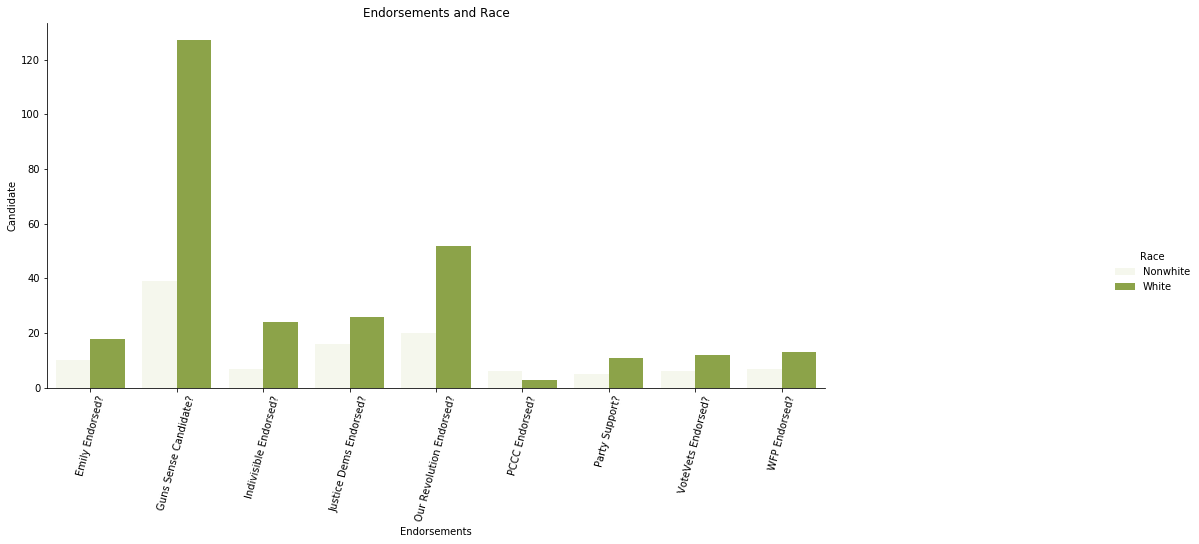

In [262]:
# Find the endorsements by Race
endors_race = dem[(dem.Endorsements != 'No')]
endors_race = endors_race[endors_race['Race'].notnull()]

# Remove Biden and Sanders from this list since I imported most of their endorsements from a source without the 'Race' data.
endors_race = endors_race[endors_race['Endorsements'] != 'Biden Endorsed?']
endors_race = endors_race[endors_race['Endorsements'] != 'Sanders Endorsed?']

race_plot = endors_race.groupby(['Endorsements', 'Race']).count().reset_index()
race_plot = race_plot[['Endorsements', 'Race', 'Candidate']]
print(race_plot)

# Plot 
top_can_plot = sb.catplot(x="Endorsements", y="Candidate", color='#94b23a', aspect=.7, hue = 'Race', data=race_plot, kind='bar');
top_can_plot.fig.set_size_inches(20, 6)
plt.title("Endorsements and Race")
plt.xticks(rotation = 75);

Whites dominated those elections in each of the pacs, by far, except with the PCCC, where there were twice the number of non-whites than whites. 

Back to [top](#Bi-Variate-Exploration)

# <font color='4db4cc'>Percent and Won</font>
How does the turnaround statistics for only the winners looks like

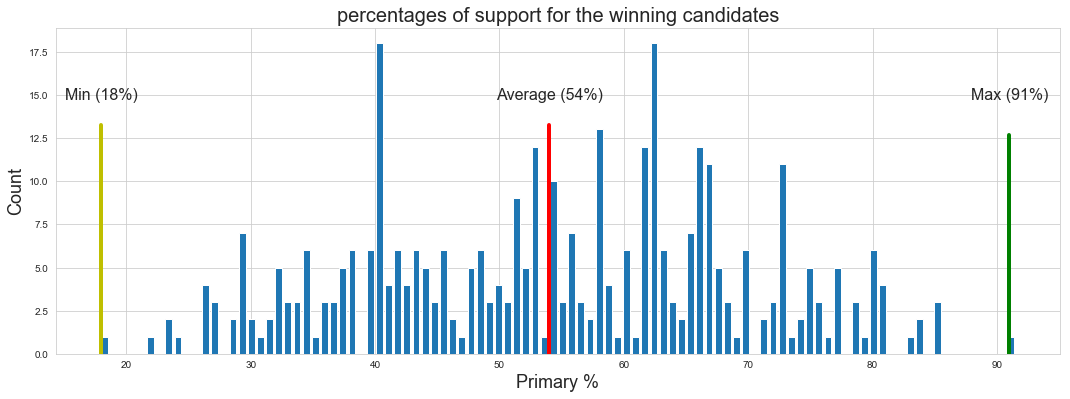

In [180]:
# Drop NAs
primary_per_win = dem.dropna(subset = ['Primary %'])

# Filter to have only winners
primary_per_win = primary_per_win[(primary_per_win.Won == 'Yes')]

primary_per_win
# Remove the 100% percenters, which were appointed more than elected from the lack of contenders.
primary_per_win = primary_per_win[primary_per_win['Primary %'] != 100]

# Plot
sb.set_style("whitegrid")#, {'axes.labelcolor': '#4db4cc'})
plt.figure(figsize=(18,6))
plt.ylabel('Count', fontsize=18)
plt.xlabel('Primary Percent', fontsize=18)

# Draw a line with the min
plt.axvline(18, 0,0.70, linewidth=4, color='y')
plt.text(18, 15, 'Min (18%)', ha='center', va='center',rotation='horizontal', size=16)

# Draw a line with the average
plt.axvline(54, 0,0.70, linewidth=4, color='r')
plt.text(54, 15, 'Average (54%)', ha='center', va='center',rotation='horizontal', size=16)

# Draw a line with the max
plt.axvline(91, 0,0.67, linewidth=4, color='g')
plt.text(91, 15, 'Max (91%)', ha='center', va='center',rotation='horizontal', size=16)

plt.title("percentages of support for the winning candidates", fontdict = {'fontsize' : 20})
sb.distplot(primary_per_win['Primary %'], bins=100, kde=False, hist_kws={"rwidth":0.75, 'alpha':1.0})


In [181]:
primary_per_win.describe()

,Partisan Lean,Primary %
count,360.000000,360.000000
mean,-16.246389,54.330833
std,20.046772,15.066512
min,-62.500000,17.900000
25%,-28.900000,41.575000
50%,-16.100000,55.000000
75%,-6.700000,65.950000
max,65.100000,91.500000


We can see above that the average winning percent support candidates received was 54%.<br>
The minimum percent of support a winning candidate had was 18%. How can someone wins with only 18%? Either the record is wrong or there were a lot of candidates.
Let's try to track this down. First, who was the candidate that won with 18% of the Democratic votes in his or her contest?

In [190]:
primary_per_win.loc[primary_per_win['Candidate'] == 'Tom Guild']

,Candidate,State,Office Type,Date,Partisan Lean,Primary %,Won,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,Endorsements,value,Progressive
1193,Tom Guild,OK,Representative,6/26/18,-17.2,17.9,Yes,NaN,No,No,No,No,No,No,No


After researching I found that Tom Guild in reality <a href="https://ballotpedia.org/Oklahoma%27s_5th_Congressional_District_election,_2018">lost the primaries</a> to Kendra Horn in the 5th disctrict of Oklahoma. I will change the record on the Exploration1 file, under Preliminary Wrangling to make sure this analysis is as close as possible to the facts. After reaserching another 30 candidates I found that some of them had missing value under the 'Won' column, so I added the data in the Exploration1 file as well.

So, was there a correlation between the percent support a candidate received and winning the primary?



In [268]:
# Check for correlation

# Drop NAs
dem_win_lose = dem.copy()
dem_win_lose = dem_win_lose.dropna(subset = ['Primary %', 'Won'])
# Create a new columns 'Win' as an integer
dem_win_lose['Win'] = dem_win_lose['Won'].map({'Yes': 1, 'No': 0}).astype(int)

# Turn the 'Primary %' column an integer as well
dem_win_lose['Primary %'] = dem_win_lose['Primary %'].astype(int)

# Print the correlation coefficient
print(np.corrcoef(dem_win_lose['Primary %'], dem_win_lose['Win']))

[[1.         0.79483998]
 [0.79483998 1.        ]]


Correlation coefficient of 0.79 tells us that there is a pretty strong correlation between the two variables. It is normal that higher support percents will end up with winnings and lowers with defeats.

Back to [top](#Bi-Variate-Exploration)

# <font color='84A3C1'>Progressive and Primary Percent</font>
Did Progressives have a better percent of support by votes they received in their respective primaries?

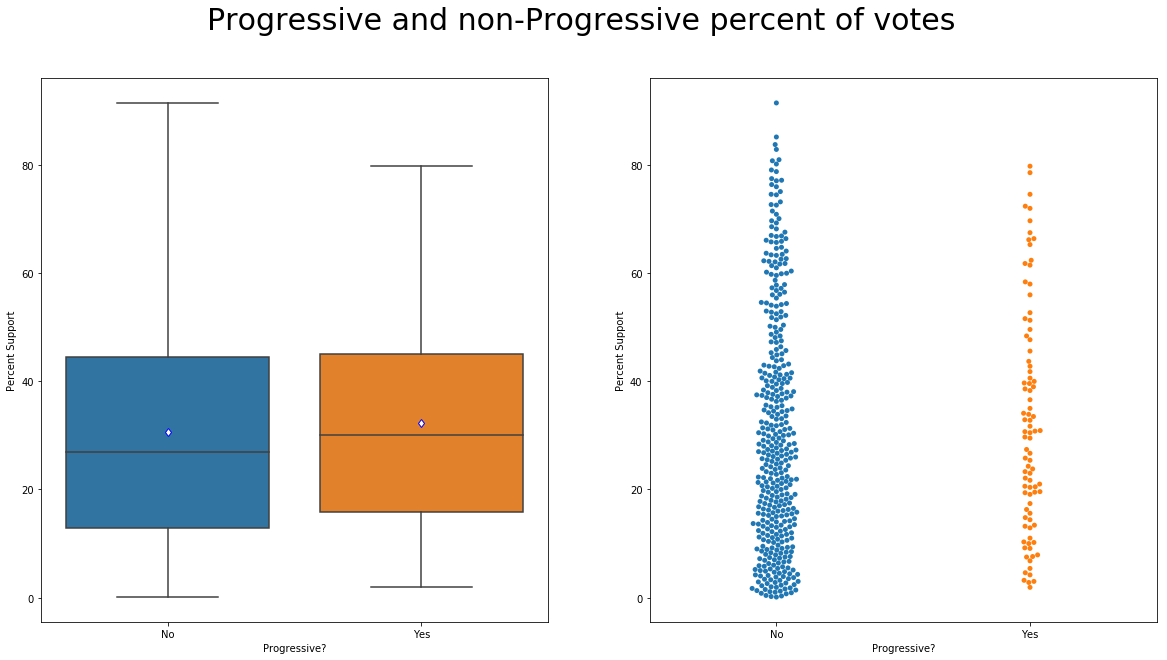

,count,mean,std,min,25%,50%,75%,max
Progressive,,,,,,,,
No,396.0,30.691246,21.843052,0.1,12.925,26.85,44.525,91.5
Yes,90.0,32.338889,20.776254,1.9,15.775,30.10,45.125,79.8


In [243]:
# Create a new dataframe
pro_percent = dem.groupby(['Candidate', 'Progressive'])['Primary %'].mean().reset_index()
pro_percent = pro_percent.drop_duplicates(['Candidate'], keep = 'last')
pro_percent = pro_percent[pro_percent['Primary %'] != 100]
pro_percent = pro_percent.groupby(['Progressive', 'Primary %']).count().reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Progressive and non-Progressive percent of votes', fontsize=30)

# progressive_support
plt.subplot(1,2,1)
sb.boxplot(x="Progressive", y="Primary %", data=pro_percent, showmeans=True, 
          meanprops={"marker":"d","markerfacecolor":"white", "markeredgecolor":"blue"}).set(
    xlabel='Progressive?', ylabel='Percent Support')

# party_support
plt.subplot(1,2,2)
sb.swarmplot(x="Progressive", y="Primary %", data=pro_percent,
          ).set(
    xlabel='Progressive?', 
    ylabel='Percent Support'
)

plt.show()
pro_percent.groupby('Progressive')['Primary %'].describe()

We can see above 2 plots that compare the distrbution of the percent of votes received by Progressive and non-Progressive candidates. The percent of votes candidates received seems to be distributed similarly in the two groups, by both the Boxplot and Swarm plot. In the Swarmplot We can see also that there are less dots (observations) that represent Progressives, which is normal since we had less Progressives competing in the different primary races than non-Progressives.<br>
Looking at the above table with the statistics of the Progressive and Primary Percent, we can see that the average and median are not very different between the two groups. So, we can say that Progressives did not have overall a better voting rate in those primaries.

Back to [Exploration2](Exploration2.ipynb) | Back to [top](#Bi-Variate-Exploration) | Continue with [Exploration4](Exploration4.ipynb)